# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Source: [kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

### Citation
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5))

### License
CC BY 4.0

# Library

We import the library which will use in this notebook.

In [169]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import precision_score, plot_confusion_matrix

from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

# Data

## Data at a glance

We will take a look at the data.

In [2]:
df = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


We have 13 columns which are:
1. <b>age</b>: age
2. <b>anaemia</b>: Decrease of red blood cells or hemoglobin (boolean)
3. <b>creatinine_phosphokinase</b>: Level of the CPK enzyme in the blood (mcg/L)
4. <b>diabetes</b>: If the patient has diabetes (boolean)
5. <b>ejection_fraction</b>: Percentage of blood leaving the heart at each contraction (percentage)
6. <b>high_blood_pressure</b>: if the patient has hypertension (boolean)
7. <b>platelets</b>: Platelets in the blood (kiloplatelets/mL)
8. <b>serum_creatinine</b>: Level of serum creatinine in the blood (mg/dL)
9. <b>serum_sodium</b>: Level of serum sodium in the blood (mEq/L)
10. <b>sex</b>: Woman or man (binary)
11. <b>smoking</b>: If the patient smokes or not (boolean)
12. <b>time</b>: Follow-up period (days)
13. <b>DEATH_EVENT</b>: If the patient deceased during the follow-up period (boolean)

<b><i>Note</i></b>:
For boolean:
* 0: no
* 1: yes

## Data info

Next we will take a look at the info of the data. We can see below that mostly for each columns have integer type of data, but column age, platelets and serum_creatinine. We also have a glance at missing values which we don't have in this data because we have 299 entries on each columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Because the age should be an integer number, then we will change data type of the column age from float to integer.

In [4]:
df['age'] = df['age'].astype(int)

## Missing Values and Duplicates

To make sure, we check on each columns if there's a missing value or not.

<AxesSubplot:>

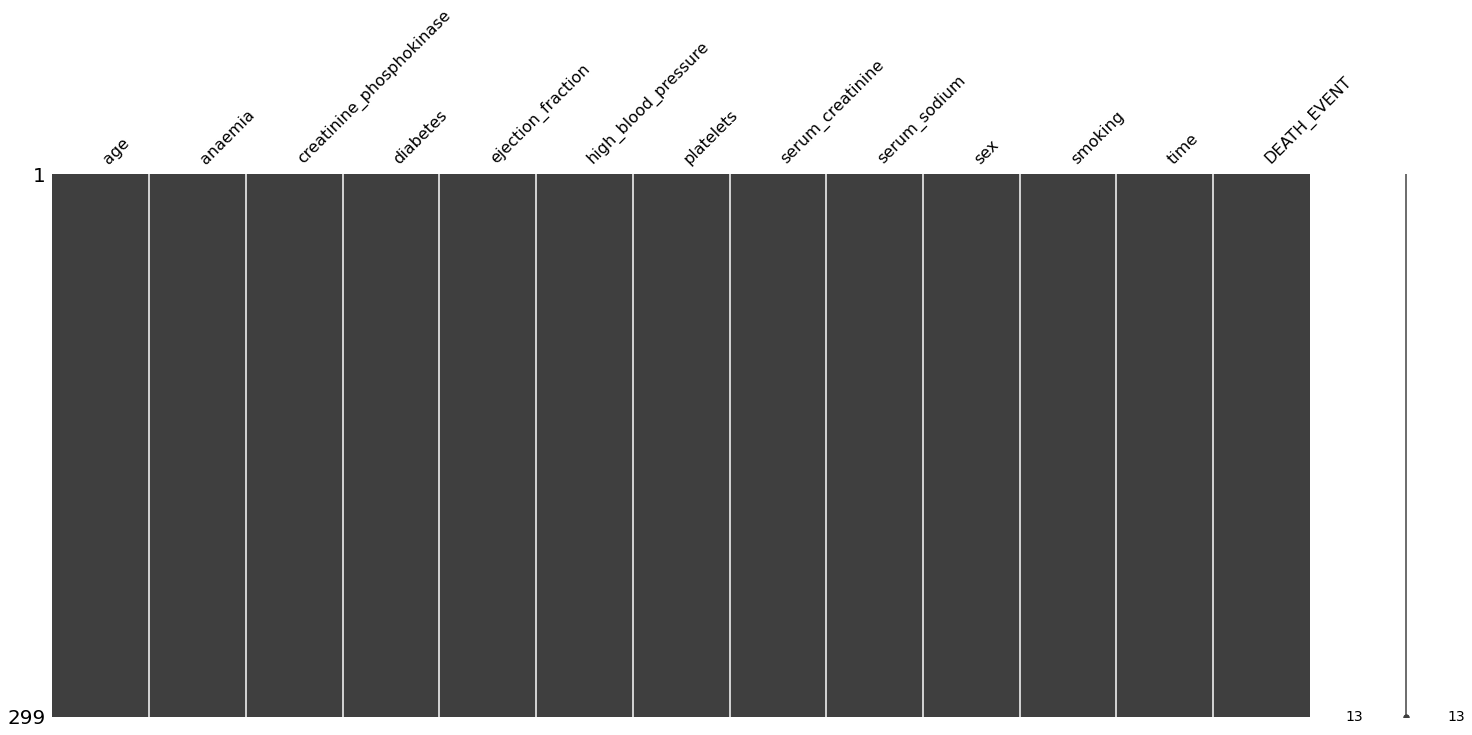

In [5]:
msno.matrix(df)

Same goes with duplicates, the data didn't have duplicate entries.

In [6]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


## Descriptive Statistics

We will take a look on descriptive statistics on this data. Thankfully, the data are all numerical, so, it's easier to do the statistics.

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Tabel above is the descriptive statistics of the data. We can see thef maximum value that each columns are in the different number. The biggest number is in columns platelets which is hundred thousands compare to serum creatinine which no more than 10. This could be a problem in machine learning process because the larger number will be dominated or have greatest influence to the results which probably not the case. So, to tackle this problem, we could use scaler for each columns to standarized the number.

# Exploratory Data Analysis

## Patient's Age Distribution

We will take a look at age distribution in this data. On previous table, we have column age range from 40 to 95 years old which match the graph below. We can see that the distribution have a skewed right shape distribution, which indicates that the column age did not have a normal distribution. 

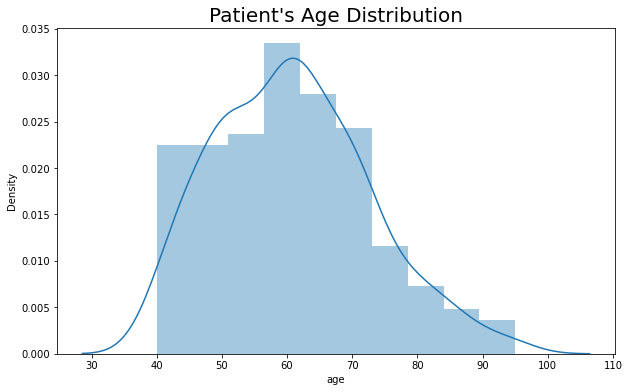

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df.age)
plt.title("Patient's Age Distribution", size=20)
plt.show()

To make sure we have normal distribution on the column age, we check with pearson's test.

In [171]:
from scipy.stats import normaltest

normaltest(df.age)

NormaltestResult(statistic=8.99091913042519, pvalue=0.011159550895107532)

In [172]:
dp_statisstic, dp_pvalue = normaltest(df.age)

if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}. So, we assume a normal distribution')
else:
    print(f'P-value: {dp_pvalue}. So, we do not assume a normal distribution')

P-value: 0.011159550895107532. So, we do not assume a normal distribution


## Distribution of Age based on Sex

From the graph below, both sex have median of 60 years old.

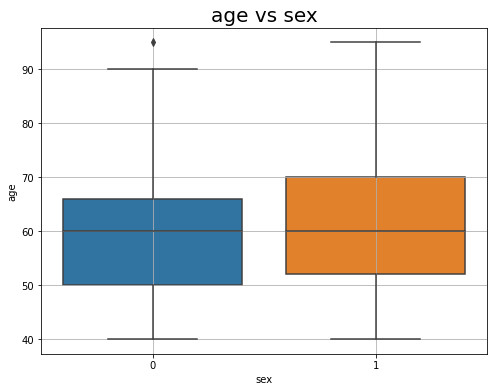

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.sex, y=df.age)
plt.title('age vs sex', size=20)
plt.grid()
plt.show()

## Age versus Death Event

From the graph below, we can see that the patient have more risk for not survived after age 70.

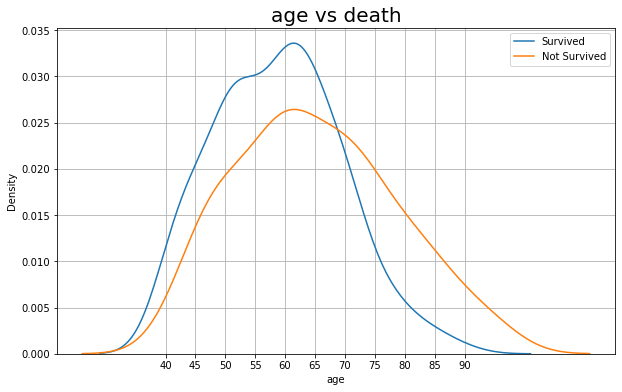

In [11]:
age_death = df[['age', 'DEATH_EVENT']]
plt.figure(figsize=(10,6))
sns.kdeplot(age_death[age_death['DEATH_EVENT'] == 0].age)
sns.kdeplot(age_death[age_death['DEATH_EVENT'] == 1].age)
plt.legend(['Survived', 'Not Survived'])
plt.xticks(np.arange(min(age_death.age), max(age_death.age), 5))
plt.title('age vs death', size=20)
plt.grid()
plt.show()

## Gender versus Death Event

From the pie chart below, for gender perspective we can see that male are more likely to survive than female.

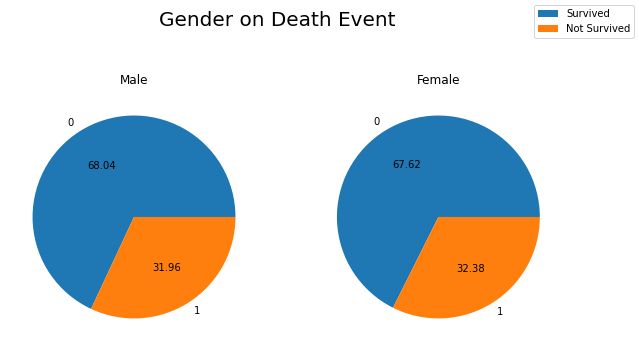

In [12]:
male = df[df['sex'] == 1]
female = df[df['sex'] == 0]

male_death_count = male.groupby('DEATH_EVENT')['sex'].count().reset_index()
female_death_count = female.groupby('DEATH_EVENT')['sex'].count().reset_index()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(labels=male_death_count['DEATH_EVENT'], x=male_death_count['sex'], autopct='%.2f')
plt.title('Male')

plt.subplot(1,2,2)
plt.pie(labels=female_death_count['DEATH_EVENT'], x=female_death_count['sex'], autopct='%.2f')
plt.title('Female')

plt.suptitle('Gender on Death Event', size=20)
plt.figlegend(['Survived', 'Not Survived'])
plt.show()

## Age, Gender and Death Event

If we include age to the gender and death event, survivability of 50-60 years old male and 60-70 years old female would be higher than other age range. Also, with the median of the box plot for male not survived are higher than female. It means that the risk for male for not survived is in the higher age than female. 

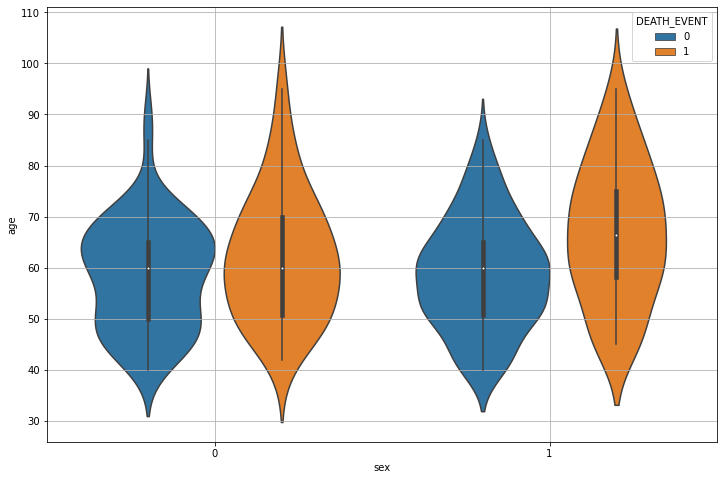

In [13]:
plt.figure(figsize=(12,8))
sns.violinplot(x='sex', y='age', hue='DEATH_EVENT', data=df)
plt.grid()
plt.show()

## Health Factors

We 4 health factors that might have contributed to heart failure. These factors will be plotted in Kernel Denisty Plot. The factors are Smoking, Diabetes, Anaemia, and High Blood Pressure. We will compared the person who have these 4 factors with age and death event. So then we will know the effect of those 4 factors and age to death event.

### Smoking

Smokers, according to CDC, are at greater risk for diseases that affect the heart and blood vessels (cardiovascular disease).
* Smoking causes stroke and coronary heart disease, which are among the leading causes of death in the United States.
* Even people who smoke fewer than five cigarettes a day can have early signs of cardiovascular disease.
* Smoking damages blood vessels and can make them thicken and grow narrower. This makes your heart beat faster and your blood pressure go up. Clots can also form.
* A stroke occurs when:
    * A clot blocks the blood flow to part of your brain;
    * A blood vessel in or around your brain bursts.
* Blockages caused by smoking can also reduce blood flow to your legs and skin.[[1]](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking/index.htm)

From the graph below, we can see that the smoking person is highly risk for heart failure from the age of 60.

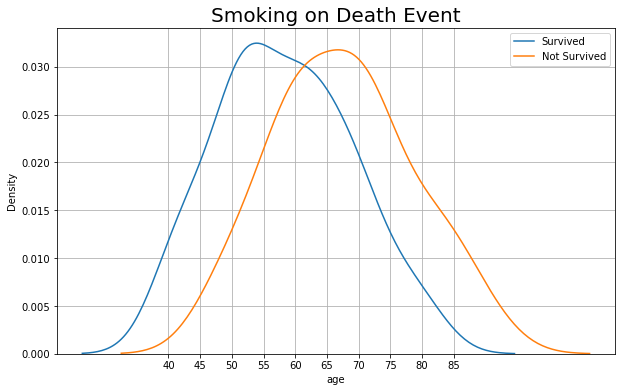

In [14]:
smoker = df[df['smoking'] == 1]
plt.figure(figsize=(10,6))
sns.kdeplot(smoker[smoker['DEATH_EVENT'] == 0].age)
sns.kdeplot(smoker[smoker['DEATH_EVENT'] == 1].age)
plt.legend(['Survived', 'Not Survived'])
plt.xticks(np.arange(min(smoker.age), max(smoker.age), 5))
plt.title('Smoking on Death Event', size=20)
plt.grid()
plt.show()

### Diabetes

According to CDC, diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

If you have diabetes, your body either doesn’t make enough insulin or can’t use the insulin it makes as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.[[2]](https://www.cdc.gov/diabetes/basics/diabetes.html)

From the graph below, the person with diabetes have higher risk of heart failure from the age of 65.

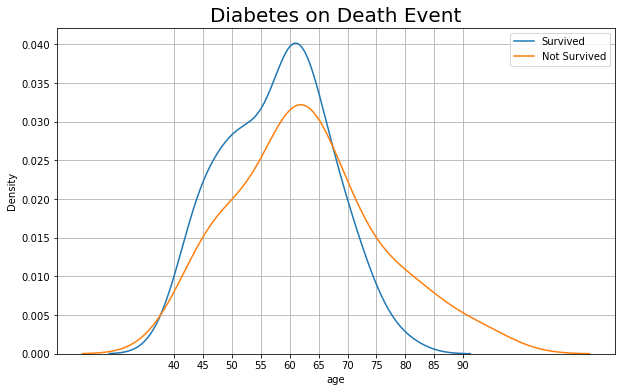

In [15]:
diabetes = df[df['diabetes'] == 1]
plt.figure(figsize=(10,6))
sns.kdeplot(diabetes[diabetes['DEATH_EVENT'] == 0].age)
sns.kdeplot(diabetes[diabetes['DEATH_EVENT'] == 1].age)
plt.legend(['Survived', 'Not Survived'])
plt.xticks(np.arange(min(diabetes.age), max(diabetes.age), 5))
plt.title('Diabetes on Death Event', size=20)
plt.grid()
plt.show()

### Anaemia

Anaemia is a deficiency in the number or quality of red blood cells in your body. Red blood cells carry oxygen around your body using a particular protein called haemoglobin. Anaemia means that either the level of red blood cells or the level of haemoglobin is lower than normal. When a person has anaemia, their heart has to work harder to pump the quantity of blood needed to get enough oxygen around their body. During heavy exercise, the cells may not be able to carry enough oxygen to meet the body’s needs and the person can become exhausted and feel unwell. Anaemia isn’t a disease in itself, but a result of a malfunction somewhere in the body. This blood condition is common, particularly in females. Some estimates suggest that around one in five menstruating women and half of all pregnant women are anaemic.[[3]](https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/anaemia)

From graph below, the person who have anaemia have higher risk to heart failure from the age of 70. Although, the effect of anaemia itself are lower compared to smoking and diabetes. 

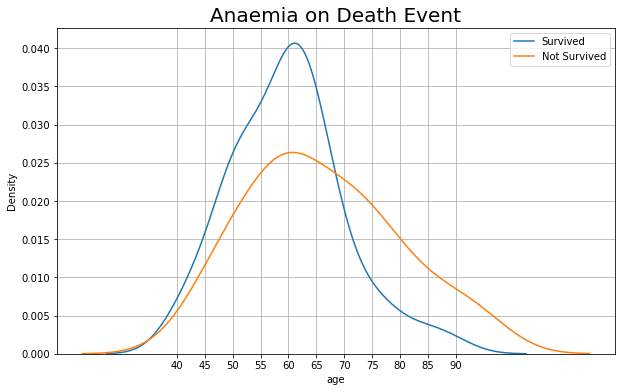

In [16]:
anaemia = df[df['anaemia'] == 1]
plt.figure(figsize=(10,6))
sns.kdeplot(anaemia[anaemia['DEATH_EVENT'] == 0].age)
sns.kdeplot(anaemia[anaemia['DEATH_EVENT'] == 1].age)
plt.legend(['Survived', 'Not Survived'])
plt.xticks(np.arange(min(anaemia.age), max(anaemia.age), 5))
plt.title('Anaemia on Death Event', size=20)
plt.grid()
plt.show()

### High Blood Pressure

High blood pressure, also called hypertension, is blood pressure that is higher than normal. Health care professionals diagnose patients with high blood pressure if their blood pressure is consistently 130/80 mm Hg or higher.

High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the heart can cause:
* Chest pain, also called angina.
* Heart attack, which happens when the blood supply to your heart is blocked and heart muscle begins to die without enough oxygen. The longer the blood flow is blocked, the greater the damage to the heart.
* Heart failure, a condition that means your heart can’t pump enough blood and oxygen to your other organs.[[4]](https://www.cdc.gov/bloodpressure/about.htm)

From the graph below, the person with high blood pressure have high risk to heart failure from the age of 70. It's similar with anaemia, high blood pressure also have lower effect of heart failure compared to smoking and diabetes.

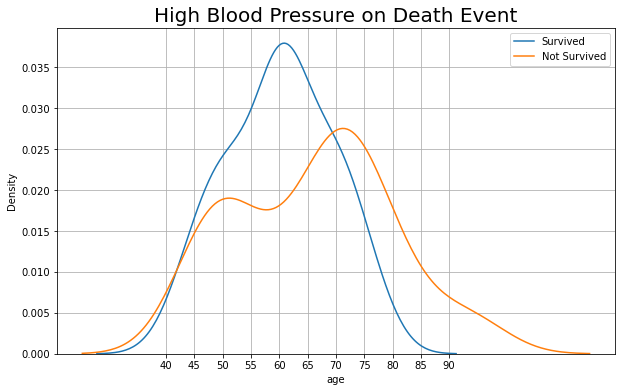

In [17]:
high_blood_pressure = df[df['high_blood_pressure'] == 1]
plt.figure(figsize=(10,6))
sns.kdeplot(high_blood_pressure[high_blood_pressure['DEATH_EVENT'] == 0].age)
sns.kdeplot(high_blood_pressure[high_blood_pressure['DEATH_EVENT'] == 1].age)
plt.legend(['Survived', 'Not Survived'])
plt.xticks(np.arange(min(high_blood_pressure.age), max(high_blood_pressure.age), 5))
plt.title('High Blood Pressure on Death Event', size=20)
plt.grid()
plt.show()

## Other Factors

We present 5 other factors that might have contributed to heart failure. These factors will be plotted in histogram. The factors are Createnine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, and Serum Sodium. We will compared these 5 factors with death event to know how these factors contributed to heart failure.

### Createnine Phosphokinase

Creatine phosphokinase (a.k.a., creatine kinase, CPK, or CK) is an enzyme (a protein that helps to elicit chemical changes in your body) found in your heart, brain, and skeletal muscles. When muscle tissue is damaged, CPK leaks into your blood. Therefore, high levels of CPK usually indicate some sort of stress or injury to your heart or other muscles. To test CPK, blood is drawn from a vein in your arm. In the hospital, a person’s CK-MB level is often checked when they exhibit signs of heart attack.[[5]](https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/)

From the boxplot below, median of CPK of the person who survived are similar to the person who not survived. It means that high CPK is not the main factor that cause heart failure.

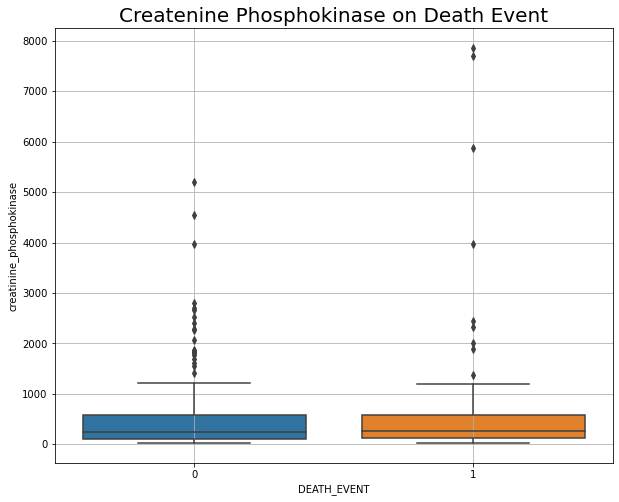

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df.creatinine_phosphokinase, x=df.DEATH_EVENT)
plt.title('Createnine Phosphokinase on Death Event', size=20)
plt.grid()
plt.show()

### Ejection Fraction

Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent. A ejection fraction measurement under 40 percent may be evidence of heart failure.[[6]](https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement)

From the graph below, we can see that the median of ejection fraction of the person who not survived are lower than the person who survived. This seems right as explained above that the ejection fraction lower than 40 percent is the indication of heart failure. What's interesting though, both median are below 40, it means that most of the patient have a heart disease. 

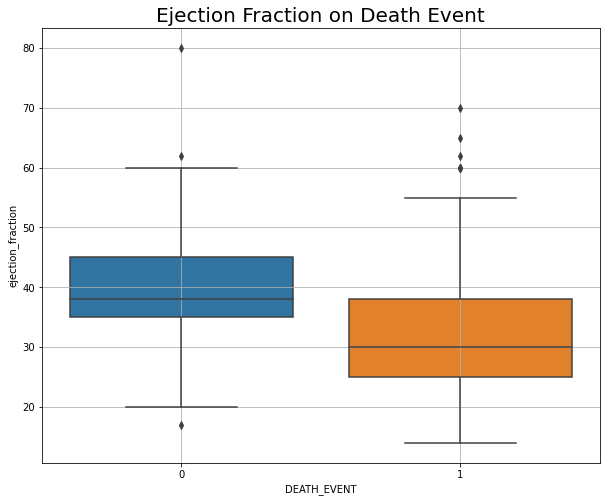

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df.ejection_fraction, x=df.DEATH_EVENT)
plt.title('Ejection Fraction on Death Event', size=20)
plt.grid()
plt.show()

### Platelets

Platelets are tiny blood cells that help your body form clots to stop bleeding. If one of your blood vessels gets damaged, it sends out signals to the platelets. The platelets then rush to the site of damage and form a plug (clot) to fix the damage.[[7]](https://www.urmc.rochester.edu/encyclopedia/content.aspx?ContentTypeID=160&ContentID=36)

If you have too many platelets, it can increase your risk for clotting. But often your cardiovascular risk has more to do with platelet function than platelet number. For example, you could have a healthy number of platelets, but if they’re sticking together too much it can increase your chance of having a heart attack or stroke.[[8]](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important)

From the graph below, we can see that the number of platelets are similar between the person who survived and not survived. This confirm that the effect of platelet number are not important compared to the effect of platelet function as explained above.

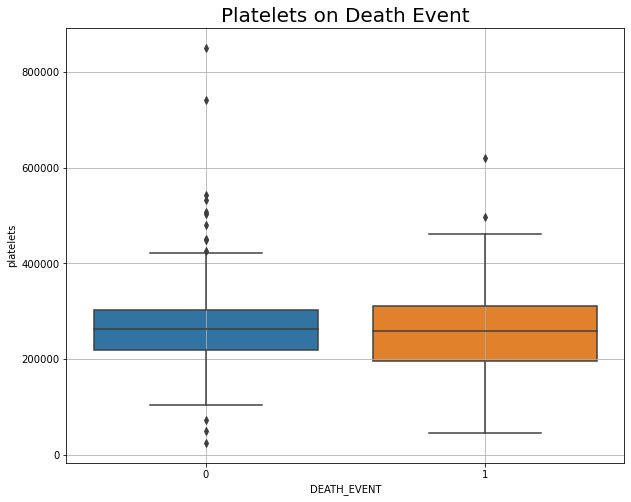

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df.platelets, x=df.DEATH_EVENT)
plt.title('Platelets on Death Event', size=20)
plt.grid()
plt.show()

### Serum Creatinine

Creatinine is a waste product that forms when creatine, which is found in your muscle, breaks down. Creatinine levels in the blood can provide your doctor with information about how well your kidneys are working.[[9]](https://www.healthline.com/health/creatinine-blood) Even tough creatinine have always been associated with how well yout kidney are working, elevated serum creatinine has been associated with increased mortality in hypertensive persons, the elderly, and patients with myocardial infarction or stroke in whom cardiovascular disease is the major cause of death.[[10]](https://pubmed.ncbi.nlm.nih.gov/9056611/)

From the graph below, we can see that the person who not survived have higher serum creatinine than the person who survived. This confirm that elevated serum createnine as one of the indicator of heart failure.

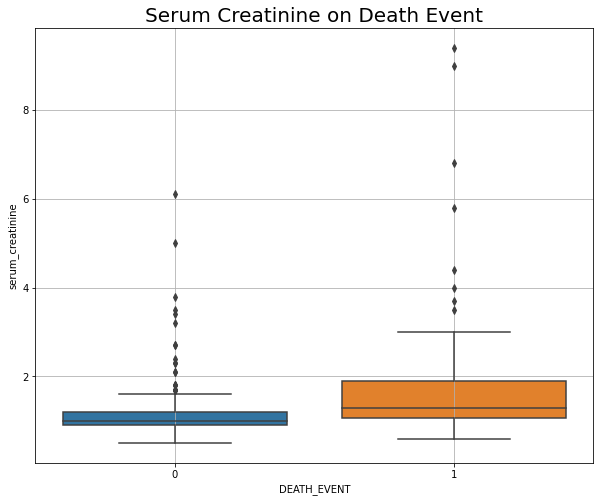

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df.serum_creatinine, x=df.DEATH_EVENT)
plt.title('Serum Creatinine on Death Event', size=20)
plt.grid()
plt.show()

### Serum Sodium

Hyponatremia is the most common electrolyte disorder and is frequently encountered in patients with advanced heart failure. Hypotonic or dilutional hyponatremia, usually simply called hyponatremia, is defined as a reduction in the serum sodium concentration to a level below 136 mEq/L. This condition represents an excess of water in relation to existing sodium and potassium stores, since the sodium concentration is determined by Edelman's Equation—the ratio of the “exchangeable” (i.e., osmotically active) portions of the body's sodium and potassium content to total body water. The development of hyponatremia in patients with heart failure increases morbidity and predisposes to falls, hip fractures, and other complications as well as hospital admissions.[[11]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385798/)

From the graph below, we can see that the median of serum sodium are 136 mEq/L in the person who not survived. While the median of serum sodium for the person who survived are higher than 136 mEq/L. It confirm, as explainded above, that the person who survive would have serum sodium above 136 mEq/L.

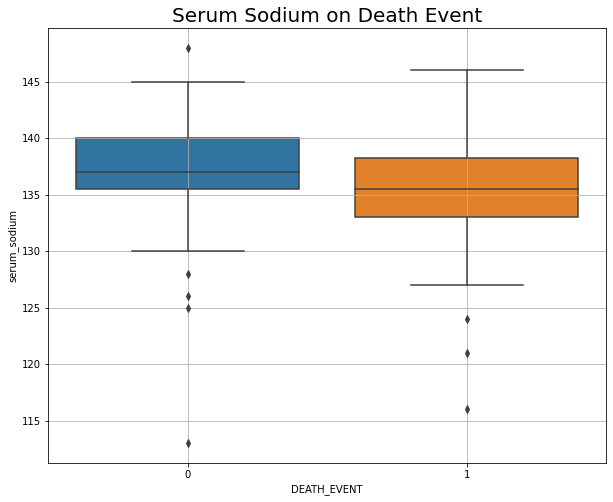

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df.serum_sodium, x=df.DEATH_EVENT)
plt.title('Serum Sodium on Death Event', size=20)
plt.grid()
plt.show()

## Time on Death Event

From the graph below, we can see that the survivability is increasing when the time gets longer. Probably the graph shows that the patient with better condition would not need a treatment immediately, so the graph shows the longer time for the patient who survived. Meanwhile, for the patient with bad condition probably need treatment immediately. That's why the graph shows that the patient who did not survived have shorter time compared to the patient with good condition.

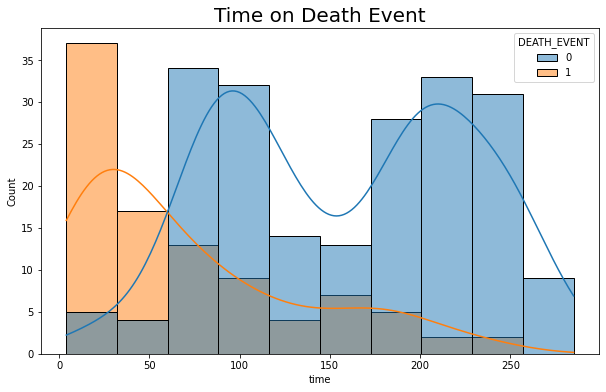

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(x=df.time, hue=df.DEATH_EVENT, kde=True)
plt.title('Time on Death Event', size=20)
plt.show()

## Correlation

Next, we check the correlation between variables.

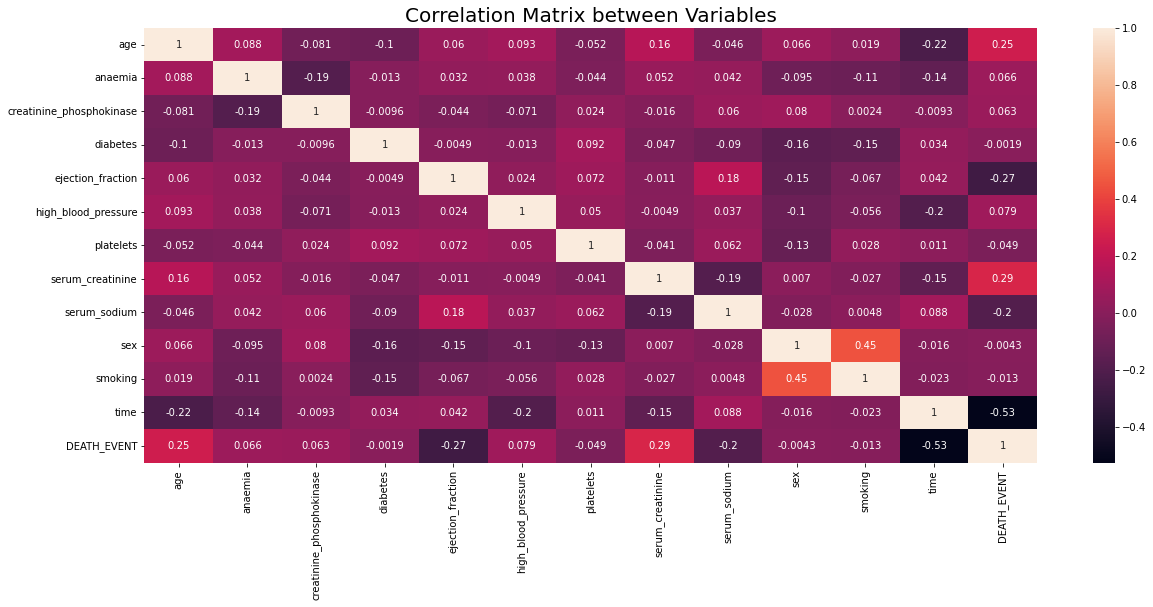

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix between Variables', size=20)
plt.show()

From the table above, we can see that the correlation between variables are low, with the exception of variable sex and smoking which have moderate correlation with each other.

# Machine Learning Model

## Preprocessing

We begin the first part of machine learning process with Preprocessing. In this step, we want to standarized the numerical value. It means we will change all numerical value into range of 0 to 1. This process will eliminate bias from feature which have large range of number. 

We use MinMaxScaler from sklearn library to change the numerical value into range of 0 to 1.

In [25]:
minmax_scaler = MinMaxScaler()
df_minmax_scale = minmax_scaler.fit_transform(df.drop(columns='DEATH_EVENT'))
df_minmax_scaled = pd.DataFrame(data=df_minmax_scale, columns=df.columns[0:-1])
df_minmax_scaled.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


## Data Splitting

Next step, we want to split the data with 70% training data for learning process and 30% test data for validation of the model.

In [38]:
X = df_minmax_scaled
y = df['DEATH_EVENT'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=2021
)

# Model Selection

We come to second part in the machine learning process. We will selecting the model as model benchmark. The models that included in the selecting process is the model which have characteristic of supervised learning classification, especially for binary classification, because the variable traget only have value of 0 and 1. 
These models are:
1. SVC, 
2. Logistic Regression, 
3. Decision Tree Classifier, 
4. KNeighbors Classifier, 
5. Random Forest Classifier, 
6. Gradient Boosting Classifier, 
7. MLP Classifier, and XGB Classifier.

Selection process of these models will be based on precision score. This is because the target that we have is wether the patient will have heart failure or not. So, it's better to reduce the False Positive as low as possible. Thus, the people who have high risk of heart failure but mistakenly do not have high risk of heart failure will be low.

In [39]:
classifiers = ['SVM', 'Logistic',  'RandomForest', 
               'KNeighbors', 'DecisionTree', 
               'GradientBoosting', 'MLPClassifier',
               'XGBoost'
               ]

models = [svm.SVC(random_state=2021),
          LogisticRegression(random_state=2021),
          RandomForestClassifier(random_state=2021),
          DecisionTreeClassifier(random_state=2021),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=2021),
          MLPClassifier(random_state=2021),
          XGBClassifier(random_state=2021)
          ]

In [40]:
Score = pd.DataFrame({"Classifier":classifiers})
j = 0
precision = []
for i in models:
    model = i
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    precision.append(precision_score(y_test,predictions))
    j = j+1     

Score["Precision_Score"] = precision
Score.sort_values(by="Precision_Score", ascending=False,inplace = True)
Score.reset_index(drop=True, inplace=True)
Score

[10:48:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,Precision_Score
0,MLPClassifier,0.823529
1,Logistic,0.789474
2,SVM,0.785714
3,GradientBoosting,0.777778
4,RandomForest,0.750000
5,XGBoost,0.724138
6,KNeighbors,0.709677
7,DecisionTree,0.375000


From the table above, we can see that the winner is MLP Classifier based on precission score. So, we will use it as the model benchmark.

# Model Benchmark

Model benchmark is the initial model without any tuning in the parameter of the model. In this step, we will check the performance of MLP Classifier model.

In [111]:
model_bench = MLPClassifier(random_state=2021)
model_bench.fit(X_train, y_train)
y_pred_bench = model_bench.predict(X_test)

Precision_score: 0.8235294117647058


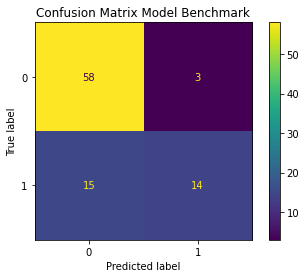

In [112]:
print('Precision_score:', precision_score(y_test, y_pred_bench))

plot_confusion_matrix(model_bench, X_test, y_test, values_format='0.7g')
plt.title('Confusion Matrix Model Benchmark')
plt.show()

From confusion matrix above, we can see that we only have 3 people that categorized as false positive with the precision score of 0.8235 or 82.35%.

# Hyperparameter Tuning

Now, we come to the process that will tune the machine learning model to have the better output and better score that the model benchmark. In this step, we will tune 2 parameters of MLP Classifier, which is hidden layer size and maximum iteration. The process start with making the variable for grid search to find the best estimators for the model and then fit to the data.

In [166]:
params = {
    'hidden_layer_sizes':[(25,),(50,),(75,),(50,100,10)],
    'max_iter':[50,100,200,500],
}

skfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    estimator=model_bench,
    param_grid=params,
    cv=skfold,
    scoring='precision',
    verbose=1,
    n_jobs=-1,
)

In [167]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/deris/opt/anaconda3/envs/forxgb/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deris/opt/anaconda3/envs/forxgb/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deris/opt/anaconda3/envs/forxgb/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/deris/opt/anaconda3/envs/forxgb/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum i

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(random_state=2021), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(25,), (50,), (75,),
                                                (50, 100, 10)],
                         'max_iter': [50, 100, 200, 500]},
             scoring='precision', verbose=1)

In [168]:
print('Precision_score:', grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)

Precision_score: 0.8799999999999999
Best Parameters: {'hidden_layer_sizes': (50,), 'max_iter': 100}


From hyperparameter tuning, we have the best estimator model with hidden layer sized (50,) and max iteration 100. The precision score of this model is 87,99%, increased 6,68% from the model benchmark. This means the tuning for this model is success to increase the performance of the model.

## Final Model

Finally, we check the performance and the result of the final model that have been tuned in the previous step. This step also will evaluate the model wether it's overfit or not.

In [162]:
model_end = grid_search.best_estimator_
model_end.fit(X_train, y_train)
y_pred_end = model_end.predict(X_test)

Precision_score: 0.8888888888888888


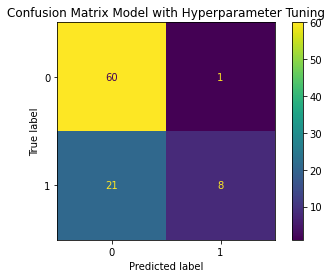

In [152]:
print('Precision_score:', precision_score(y_test, y_pred_end))
plot_confusion_matrix(model_end, X_test, y_test, values_format='0.7g')
plt.title('Confusion Matrix Model with Hyperparameter Tuning')
plt.show()

The result of the final model have decreased the False Positive from 3 people to just 1 people. The precision score is 0.8889 or 88,89%, this means the model is not overfit. Therefore, the model can be used to predict wether the patient will have heart failure or not.

# Conclusion & Recommendation

Finally, as a conclusion, this machine learning model can predict 88,89% of the patient who will have a heart failure. This model can be applied to day-to-day monitoring of the patient who have the indication of heart failure which have been tested within the included variable on this data. 